In [201]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from fmincg import fmincg

# Data Importing and Visualization

In [202]:
data = loadmat('ex6data1.mat')
X = data['X']
y = data['y']

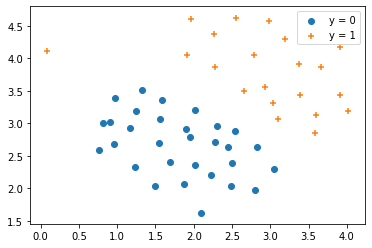

In [203]:
def plotData(X,y):
    plt.figure()
    X_zero = X[np.where(y==0)[0]]
    X_one = X[np.where(y==1)[0]]
    plt.scatter(X_zero[:,0], X_zero[:,1], marker = 'o', label = 'y = 0')
    plt.scatter(X_one[:,0], X_one[:,1], marker = '+', label = 'y = 1')
    plt.legend()
    
plotData(X,y)

# Ready to use functions for SVM (like in Andrew's course) are already there in sklearn

In [204]:
def visualizeBoundary(X, y, model, mind = -1, maxd = 5):
    plotData(X, y)
    
    d1 = np.linspace(mind, maxd, 100).reshape(-1,1)
    d2 = d1
    Xd1, yd1 = np.meshgrid(d1, d2)
    
    plt.contour(Xd1, yd1, model.predict(list(zip(Xd1.ravel(),yd1.ravel()))).reshape(Xd1.shape))

def gaussiankernel(x1, x2, sigma):
    dist = x1 - x2
    return np.e ** (-1 * np.squeeze(dist.T @ dist)/(2*sigma*sigma))


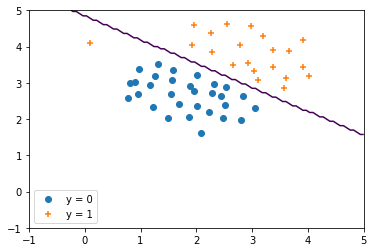

In [205]:
c = 1
svm_model = svm.SVC(C = c, kernel = 'linear', tol = 0.001).fit(X, y.ravel())
visualizeBoundaryLinear(X, y, svm_model)

# data 2

In [206]:
data = loadmat('ex6data2.mat')
X = data['X']
y = data['y']

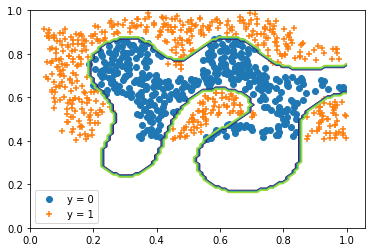

In [207]:
c = 1 
sigma = 0.1
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
# rbf is similar to gaussian so setting to similar values
svm_gauss_model= svm.SVC(c, 'rbf', tol = 0.001, gamma = 30).fit(X,y.ravel())
visualizeBoundary(X, y, svm_gauss_model, mind = 0, maxd = 1)

In [208]:
gaussiankernel(x1, x2, 2)   # ans = 0.32465246735834974

0.32465246735834974

# similar for data 3